In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score 
import matplotlib.pyplot as plt




In [3]:
df = pd.read_csv("../dataset/LoanApprovalPrediction.csv")
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
# id'leri kaldırıyoruz
df=df.drop("Loan_ID", axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [5]:
# hangi satırlarda nan var kontrolü
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)


['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [6]:
np.unique(df["Dependents"])

array([ 0.,  1.,  2.,  3., nan])

In [7]:

np.unique(df["LoanAmount"])

array([  9.,  17.,  25.,  26.,  30.,  35.,  36.,  40.,  42.,  44.,  45.,
        46.,  47.,  48.,  50.,  53.,  54.,  55.,  56.,  58.,  59.,  60.,
        61.,  62.,  63.,  65.,  66.,  67.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  78.,  80.,  81.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119., 120., 121., 122., 123.,
       124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145.,
       146., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157.,
       158., 160., 161., 162., 164., 165., 166., 167., 168., 170., 172.,
       173., 175., 176., 178., 180., 181., 182., 184., 185., 186., 187.,
       188., 190., 191., 192., 194., 196., 200., 201., 205., 207., 208.,
       209., 210., 211., 214., 216., 218., 225., 22

In [8]:

np.unique(df["Loan_Amount_Term"])

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.,  nan])

In [9]:
np.unique(df["Credit_History"])

array([ 0.,  1., nan])

In [10]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:

# kategorik verilerde mod,
# sayısal verilerde medyan,
# önemi kritik verilerde ise yeni bir kategori oluşturarak eksik verileri tamamlayabiliriz ama bu durum hepsinde geçerli olmayacak. örn: kredi vadesi sayısal olduğu halde mod kullanmak daha mantıklıdır. 

# dependents için mod
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0]) 

# loan amount için 
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

# loan amount term için
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

# kredit history kritik. eksik olarak yeni bi kategori oluşturacağım.
df["Credit_History"] = df["Credit_History"].fillna(2.0)



In [12]:
# nan kaldı mı kontrolü
nan_columns = df.columns[df.isnull().any()].tolist()
print(nan_columns)

[]


In [13]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB


In [15]:
# eksik verileri doldurdum, şimdi one hot encoding kullanarak kategorik verileri numerik veriye dönüştüreceğim. bunun için pandas dummies kullanacağım
# drop first true ise tekrara düşmeyi, fazla sütun oluşturmasını engellior. mesela kadın mısın diye sorduktan sonra erkek misin dite sormaya gerek yoktur gibi.
df = pd.get_dummies(df, dtype=int,columns=["Gender", "Married","Education", "Self_Employed", "Property_Area", "Loan_Status"], drop_first=True)
df.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,127.0,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1


In [16]:
# verilerimiz ne, ne çıktısı almak istiyoruz? şimdi bu denklemi kuruyoruz
y=df["Loan_Status_Y"]
x=df.drop("Loan_Status_Y", axis=1)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=20,train_size=0.75)

In [18]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=20)
model = tree.fit(x_train, y_train)

In [19]:
y_pred = model.predict(x_test)


In [22]:
skorlar = cross_val_score(model, x, y, cv=10)
print(f"skorlar: {skorlar}")
print(f"skorlar ortalaması: {skorlar.mean()}")

skorlar: [0.8        0.81666667 0.75       0.75       0.76666667 0.8
 0.86666667 0.81666667 0.79661017 0.83050847]
skorlar ortalaması: 0.7993785310734463


In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 21  26]
 [  1 102]]


In [24]:
# sınıflandırma raporu
report = classification_report(y_test, y_pred)
print("Sınıflandırma Raporu:\n", report)


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.88       103

    accuracy                           0.82       150
   macro avg       0.88      0.72      0.75       150
weighted avg       0.85      0.82      0.80       150



In [25]:
# ACCURACY SCORE
acc_sc = accuracy_score(y_test, y_pred)
acc_sc

0.82

In [26]:
# pozitif sonuç doğruluğu
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


Precision: 0.796875


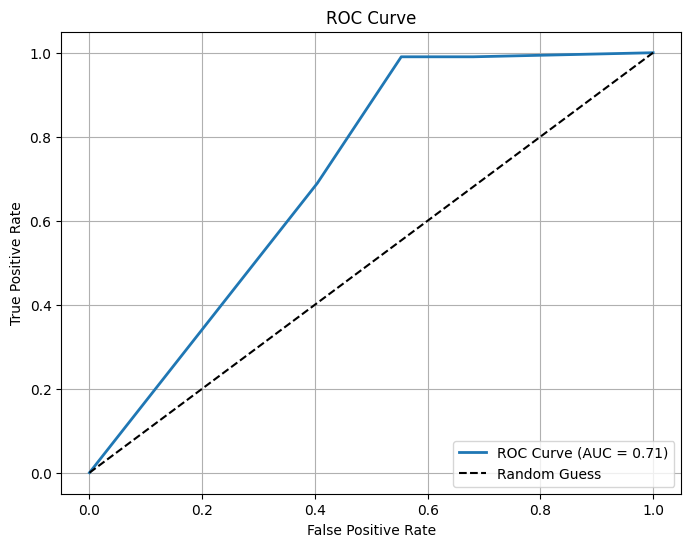

AUC Değeri: 0.71


In [27]:
# Tahmin edilen olasılıkları elde ediyoruz (pozitif sınıf için olasılıklar çünkü ROC eğrisi poztf sınıf performansı ölçmek için rasarlanmıştır)
y_scores = model.predict_proba(x_test)[:, 1] # [:, 1] çünkü negatif ve positif [0.3, 0.7] bize 0.7 lazım pozitif

# ROC ve AUC hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# AUC Değeri Yazdırma
print(f"AUC Değeri: {roc_auc:.2f}")


In [28]:
print("FPR:", fpr)
print("TPR:", tpr)
print("Thresholds:", thresholds)

FPR: [0.         0.40425532 0.55319149 0.68085106 1.        ]
TPR: [0.         0.68932039 0.99029126 0.99029126 1.        ]
Thresholds: [       inf 0.83093525 0.69306931 0.26086957 0.        ]


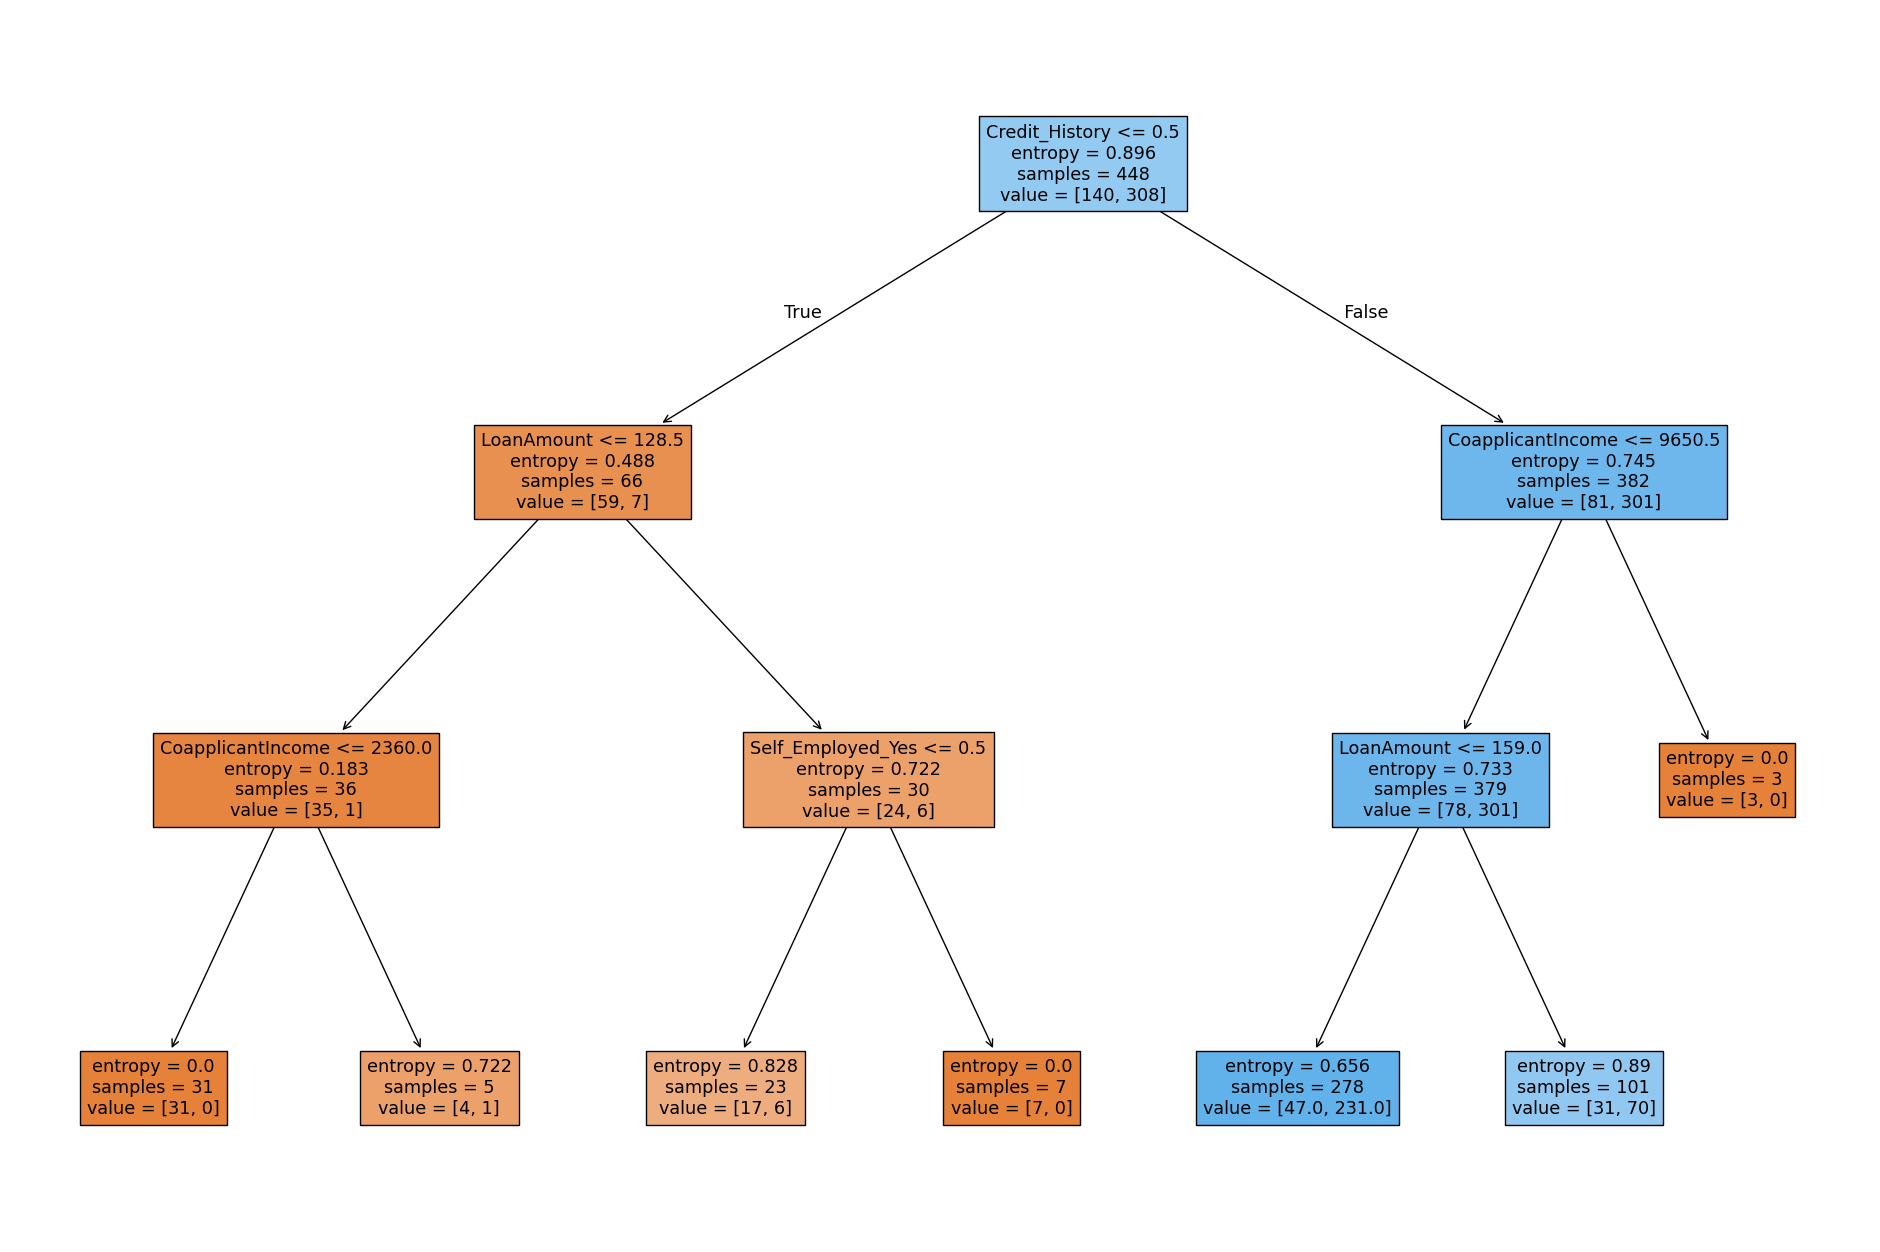

In [29]:
# ağaç çizimi
plt.figure(figsize=(24,16))
plot_tree(model, feature_names=x_train.columns, filled=True)
plt.show()


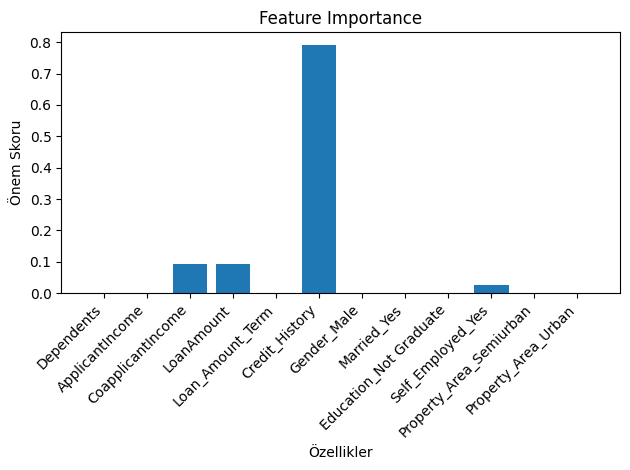

In [30]:
# ÖZELLİKLERİN ÖNEMİ
feature_names = x_train.columns 
importance = model.feature_importances_
plt.bar(feature_names, importance)
plt.xlabel("Özellikler")
plt.ylabel("Önem Skoru")
plt.title("Feature Importance")
plt.xticks(rotation=45, ha="right")  # Özellik isimlerini döndürerek daha okunabilir yap
plt.tight_layout()  # Grafik elemanlarının üst üste binmesini engelle
plt.show()
